In [ ]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

DATA PREPARATION

In [ ]:
# Read the CSV file
train = pd.read_csv('stroketrain.csv')
test = pd.read_csv('stroketest.csv')
print('The dimension of the train dataset is:', train.shape)
print('The dimension of the test dataset is:', test.shape)

The dimension of the train dataset is: (15304, 12)
The dimension of the test dataset is: (10204, 11)


In [ ]:
#drop null values
train.dropna(inplace=True)

#drop missing
print('The dimension of the train dataset is after dropping null values:', train.shape)

The dimension of the train dataset is after dropping null values: (15304, 12)


In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
le = LabelEncoder()

for col in train.columns:
    if train[col].dtype == 'object':
        train[col] =  le.fit_transform(train[col])

In [ ]:
X = train.drop(columns = ['stroke'])
Y = train['stroke']

print(X.shape, Y.shape)

(15304, 11) (15304,)


In [ ]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [ ]:
le = LabelEncoder()

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] =  le.fit_transform(test[col])

DATA EXPLORATION

In [ ]:
round(100*train['stroke'].value_counts() / train.shape[0], 2)

0    95.87
1     4.13
Name: stroke, dtype: float64

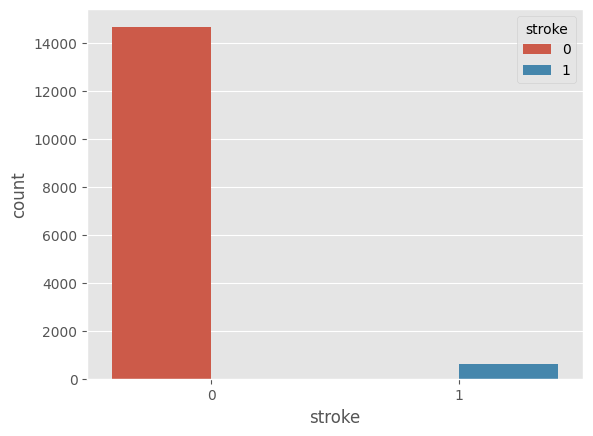

In [ ]:
sns.countplot(x = 'stroke', hue = 'stroke', data = train);

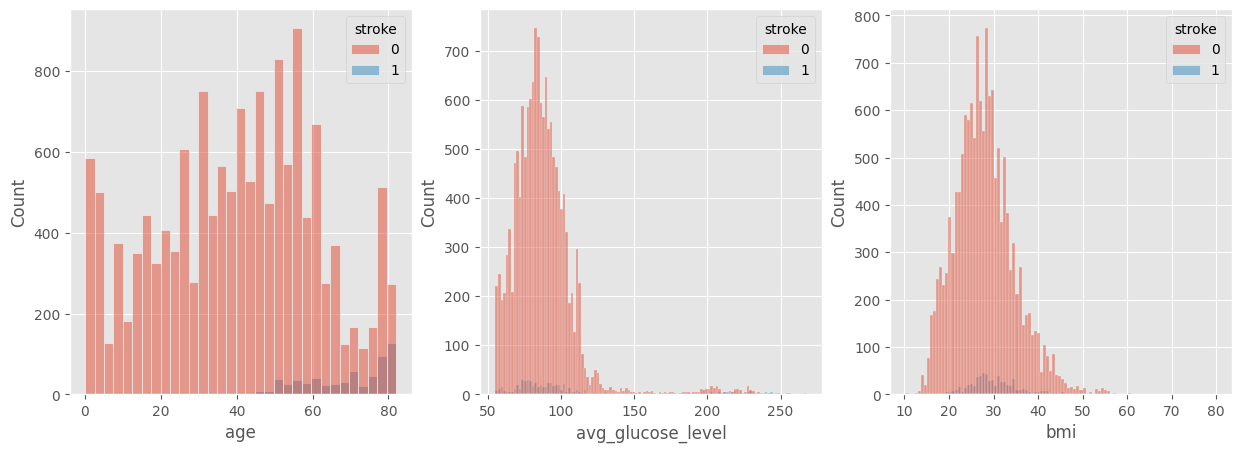

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(ax=axes[0], x='age', hue='stroke', fill=True, data=train)
sns.histplot(ax=axes[1], x='avg_glucose_level', hue='stroke', fill=True, data=train)
sns.histplot(ax=axes[2], x='bmi', hue='stroke', fill=True, data=train)

plt.show()


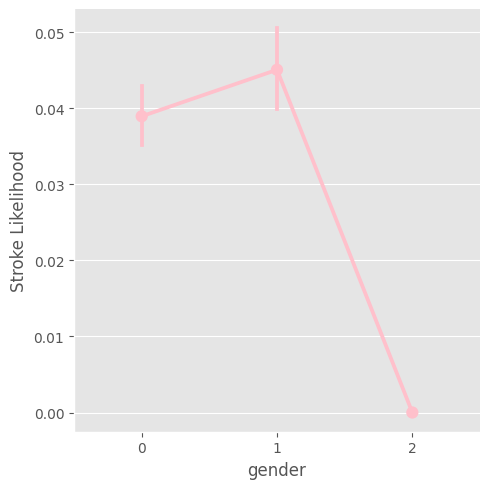

In [ ]:
plot1 = sns.catplot(data = train, x = 'gender', y = 'stroke', kind = 'point', color = 'pink')
plot1.set_xlabels('gender', fontsize = 12)
plot1.set_ylabels('Stroke Likelihood', fontsize = 12);

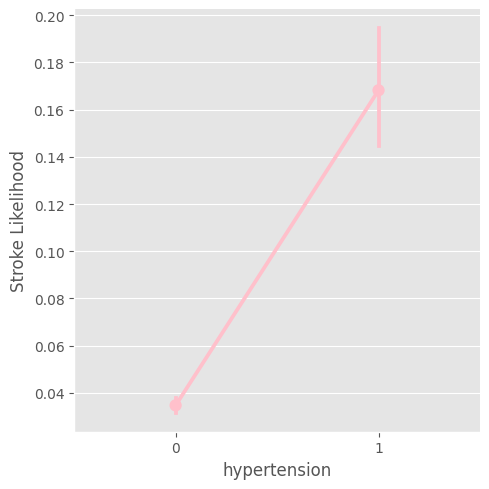

In [ ]:
plot1 = sns.catplot(data = train, x = 'hypertension', y = 'stroke', kind = 'point', color = 'pink')
plot1.set_xlabels('hypertension', fontsize = 12)
plot1.set_ylabels('Stroke Likelihood', fontsize = 12);

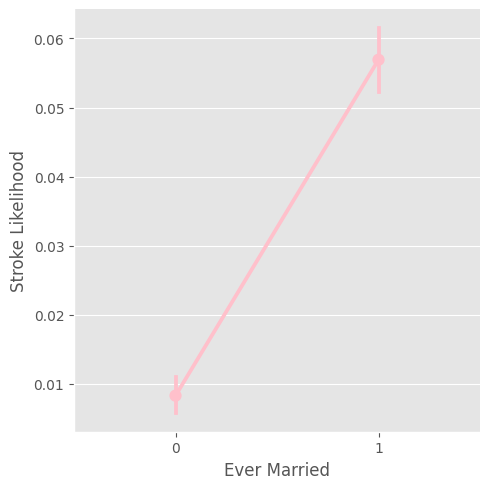

In [ ]:
plot1 = sns.catplot(data = train, x = 'ever_married', y = 'stroke', kind = 'point', color = 'pink')
plot1.set_xlabels('Ever Married', fontsize = 12)
plot1.set_ylabels('Stroke Likelihood', fontsize = 12);

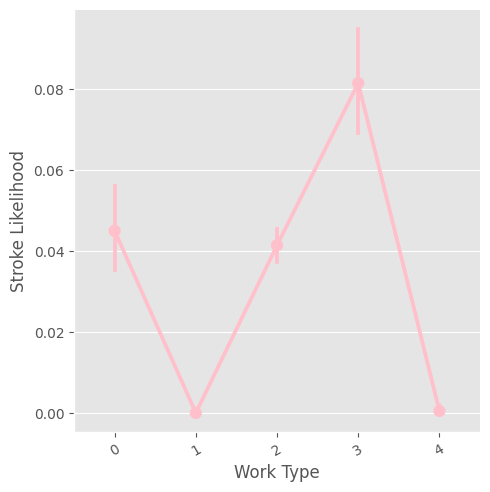

In [ ]:
plot1 = sns.catplot(data = train, x = 'work_type', y = 'stroke', kind = 'point', color = 'pink')
plot1.set_xlabels('Work Type', fontsize = 12)
plot1.set_ylabels('Stroke Likelihood', fontsize = 12)
plot1.set_xticklabels(rotation = 30);

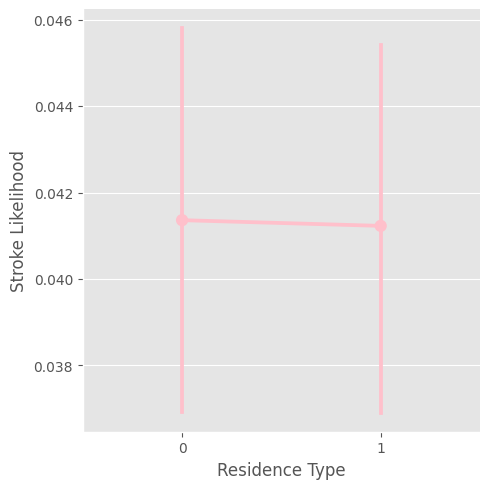

In [ ]:
plot1 = sns.catplot(data = train, x = 'Residence_type', y = 'stroke', kind = 'point', color = 'pink')
plot1.set_xlabels('Residence Type', fontsize = 12)
plot1.set_ylabels('Stroke Likelihood', fontsize = 12);

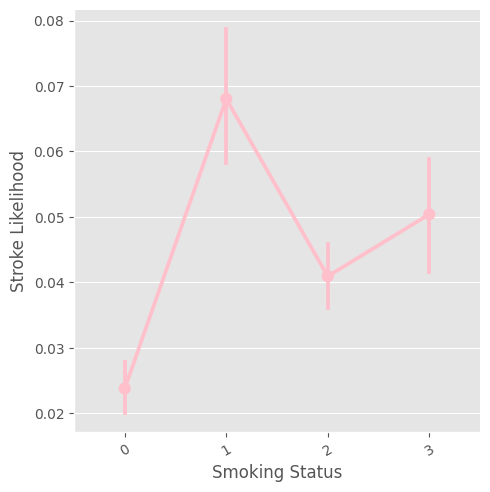

In [ ]:
plot1 = sns.catplot(data = train, x = 'smoking_status', y = 'stroke', kind = 'point', color = 'pink')
plot1.set_xlabels('Smoking Status', fontsize = 12)
plot1.set_ylabels('Stroke Likelihood', fontsize = 12)
plot1.set_xticklabels(rotation = 30);

 ENSEMBLE MODELLING

RANDOM FOREST

In [ ]:
# Random Forest with Bagging
bagged_RF = BaggingClassifier(
    base_estimator=RandomForestClassifier(
        max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=300
    ),
    n_estimators=5,
    random_state=42
)

In [ ]:
cv_scores, roc_auc_scores = [], []

# Cross-validation and training for Random Forest with Bagging
for i in range(5):
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    for train_ix, test_ix in skf.split(X, Y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        bagged_RF.fit(X_train, Y_train)
        RF_pred_1 = bagged_RF.predict_proba(X_test)[:, 1]
        roc_auc_scores.append(roc_auc_score(Y_test, RF_pred_1))
    cv_scores.append(np.mean(roc_auc_scores))

RF_cv_score = np.mean(cv_scores)
print('Random Forest Bagged ROC-AUC:', RF_cv_score)

Random Forest Bagged ROC-AUC: 0.8863275018238674


In [ ]:
# Making predictions on the entire train dataset
bagged_RF.fit(X, Y)
train_preds_RF = pd.DataFrame({'stroke': Y, 'stroke_pred': bagged_RF.predict_proba(X)[:, 1]})
train_preds_RF.head()

,stroke,stroke_pred
0,0,0.018197
1,0,0.015826
2,0,0.029721
3,0,0.044890
4,0,0.007927


In [ ]:
# Plot ROC curves for each bagged classifier
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

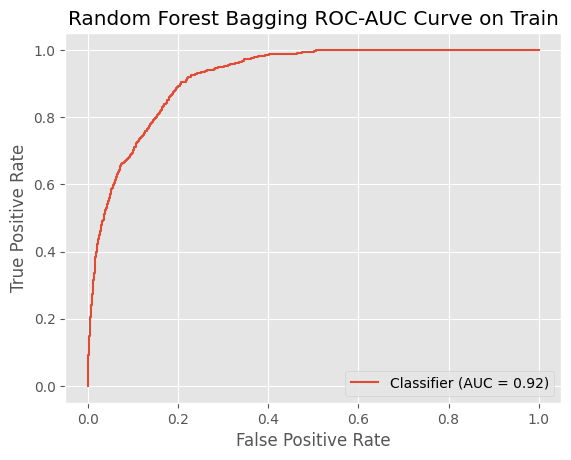

In [ ]:
# Random Forest Bagging
RocCurveDisplay.from_predictions(train_preds_RF['stroke'], train_preds_RF['stroke_pred'])
plt.title('Random Forest Bagging ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

SVM

In [ ]:
# SVM with Bagging
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
bagged_SVM = BaggingClassifier(
    base_estimator=SVC(C=100, gamma=1, kernel='rbf', probability=True),
    n_estimators=5,
    random_state=42
)

In [ ]:
# Cross-validation and training for SVM with Bagging
cv_scores_SVM, roc_auc_scores_SVM = [], []
for i in range(5):
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    for train_ix, test_ix in skf.split(X_scaled, Y):
        X_train, X_test = X_scaled[train_ix], X_scaled[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        bagged_SVM.fit(X_train, Y_train)
        SVM_pred_1 = bagged_SVM.predict_proba(X_test)[:, 1]
        roc_auc_scores_SVM.append(roc_auc_score(Y_test, SVM_pred_1))
    cv_scores_SVM.append(np.mean(roc_auc_scores_SVM))

SVM_cv_score = np.mean(cv_scores_SVM)
print('SVM Bagged ROC-AUC:', SVM_cv_score)

SVM Bagged ROC-AUC: 0.7592738242137689


In [ ]:
# Making predictions on the entire train dataset for SVM with Bagging
bagged_SVM.fit(X_scaled, Y)
train_preds_SVM = pd.DataFrame({'stroke': Y, 'stroke_pred': bagged_SVM.predict_proba(X_scaled)[:, 1]})
train_preds_SVM.head()

,stroke,stroke_pred
0,0,0.036194
1,0,0.059933
2,0,0.043027
3,0,0.052492
4,0,0.003648


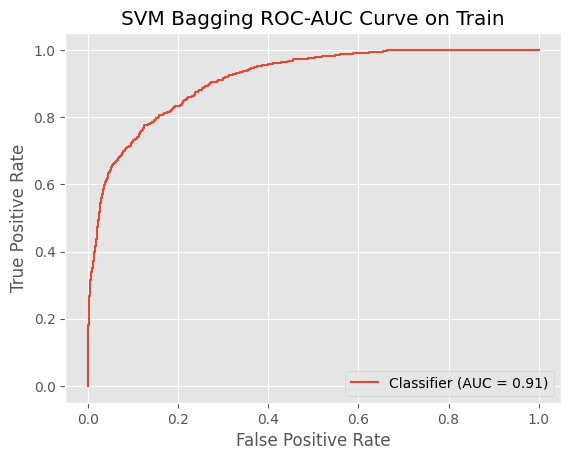

In [ ]:
# SVM Bagging
RocCurveDisplay.from_predictions(train_preds_SVM['stroke'], train_preds_SVM['stroke_pred'])
plt.title('SVM Bagging ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

LOGISTIC

In [ ]:
# Logistic Regression with Bagging
bagged_LR = BaggingClassifier(
    base_estimator=LogisticRegression(
        C=0.2, penalty='l1', solver='saga', max_iter=10000
    ),
    n_estimators=5,
    random_state=42
)


In [ ]:
# Cross-validation and training for Logistic Regression with Bagging
cv_scores_LR, roc_auc_scores_LR = [], []
for i in range(5):
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    for train_ix, test_ix in skf.split(X, Y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        bagged_LR.fit(X_train, Y_train)
        LR_pred_1 = bagged_LR.predict_proba(X_test)[:, 1]
        roc_auc_scores_LR.append(roc_auc_score(Y_test, LR_pred_1))
    cv_scores_LR.append(np.mean(roc_auc_scores_LR))

LR_cv_score = np.mean(cv_scores_LR)
print('Logistic Regression Bagged ROC-AUC:', LR_cv_score)

Logistic Regression Bagged ROC-AUC: 0.696549265426204


In [ ]:
# Making predictions on the entire train dataset for Logistic Regression with Bagging
bagged_LR.fit(X, Y)
train_preds_LR = pd.DataFrame({'stroke': Y, 'stroke_pred': bagged_LR.predict_proba(X)[:, 1]})
train_preds_LR.head()

,stroke,stroke_pred
0,0,0.032296
1,0,0.095341
2,0,0.015875
3,0,0.133618
4,0,0.038303


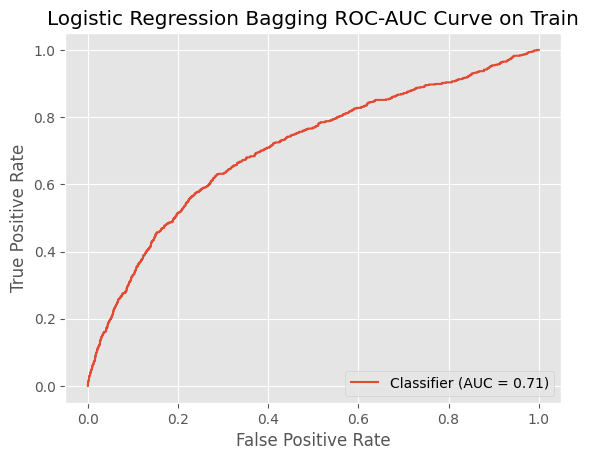

In [ ]:
# Logistic Regression Bagging
RocCurveDisplay.from_predictions(train_preds_LR['stroke'], train_preds_LR['stroke_pred'])
plt.title('Logistic Regression Bagging ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

GRADIENT BOOSTING

In [ ]:
# Gradient Boosting with Bagging
bagged_GB = BaggingClassifier(
    base_estimator=GradientBoostingClassifier(
        n_estimators=500, learning_rate=0.01, max_depth=5,
        min_samples_split=10, subsample=0.8
    ),
    n_estimators=5,
    random_state=42
)


In [ ]:
# Cross-validation and training for Gradient Boosting with Bagging
cv_scores_GB, roc_auc_scores_GB = [], []
for i in range(5):
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    for train_ix, test_ix in skf.split(X, Y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

        bagged_GB.fit(X_train, Y_train)
        GB_pred_1 = bagged_GB.predict_proba(X_test)[:, 1]
        roc_auc_scores_GB.append(roc_auc_score(Y_test, GB_pred_1))
    cv_scores_GB.append(np.mean(roc_auc_scores_GB))

GB_cv_score = np.mean(cv_scores_GB)
print('Gradient Boosting Bagged ROC-AUC:', GB_cv_score)

Gradient Boosting Bagged ROC-AUC: 0.8846373212808654


In [ ]:
# Making predictions on the entire train dataset for Gradient Boosting with Bagging
bagged_GB.fit(X, Y)
train_preds_GB = pd.DataFrame({'stroke': Y, 'stroke_pred': bagged_GB.predict_proba(X)[:, 1]})
train_preds_GB.head()

,stroke,stroke_pred
0,0,0.004654
1,0,0.003597
2,0,0.010213
3,0,0.043011
4,0,0.003771


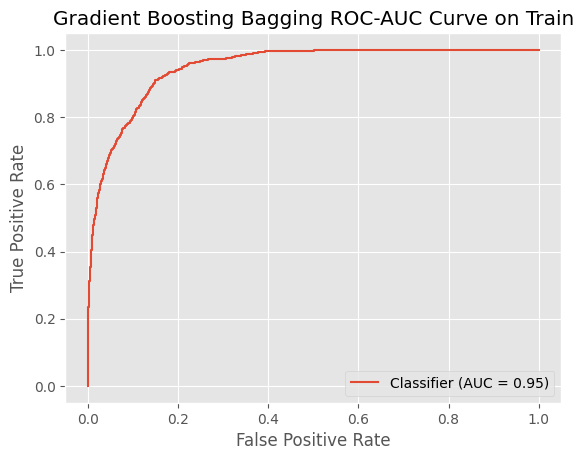

In [ ]:
# Gradient Boosting Bagging
RocCurveDisplay.from_predictions(train_preds_GB['stroke'], train_preds_GB['stroke_pred'])
plt.title('Gradient Boosting Bagging ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AVERAGE OF ALL CLASSIFIERS

In [ ]:
# Calculate average prediction probability across all bagged classifiers
avg_train_preds = (train_preds_RF + train_preds_LR + train_preds_SVM + train_preds_GB) / 4

# You can print the first few values of avg_train_preds
avg_train_preds.head()

,stroke,stroke_pred
0,0.0,0.022835
1,0.0,0.043674
2,0.0,0.024709
3,0.0,0.068503
4,0.0,0.013412


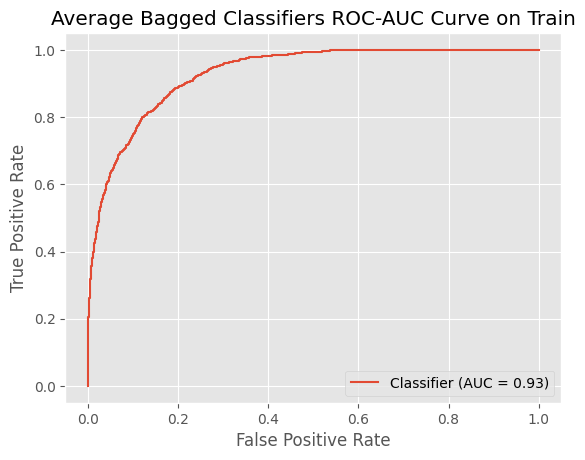

In [ ]:
# Plot ROC curve for the average predictions
RocCurveDisplay.from_predictions(avg_train_preds['stroke'], avg_train_preds['stroke_pred'])
plt.title('Average Bagged Classifiers ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

PREDICT FOR USER INPUT VALUES

In [ ]:
#CREATE A NEW DATAFRAME FOR INPUT-REFERENCE

df = pd.read_csv('stroketest.csv')
df

#change categorical-data to numerical-data

from sklearn.preprocessing import LabelEncoder
category_data = ['gender', 'ever_married','work_type','Residence_type','smoking_status']

for data in category_data:
  df[data] = LabelEncoder().fit_transform(df[data])


#use fillna to replace null-values
mean = np.mean(df['bmi'])
mean

df['bmi'].fillna(mean,inplace=True)

df = df.drop(columns='id')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,57.0,0,0,1,2,0,82.54,33.4,0
1,1,70.0,1,0,1,2,1,72.06,28.5,0
2,0,5.0,0,0,0,4,1,103.72,19.5,0
3,0,56.0,0,0,1,0,1,69.24,41.4,3
4,1,32.0,0,0,1,2,0,111.15,30.1,3
...,...,...,...,...,...,...,...,...,...,...
10199,0,27.0,0,0,0,2,1,75.77,17.6,2
10200,1,49.0,0,0,1,2,1,102.91,26.7,0
10201,0,3.0,0,0,0,4,0,104.04,18.3,0
10202,1,31.0,0,0,1,2,1,82.41,28.7,2


Prediction Function Code

In [ ]:
model = avg_train_preds
def prediction(g,a,hyt,ht,m,w,r,gl,b,s):

  #gender
  if g == "male":
    g = 1
  elif g == "female":
    g = 0
  else:
    g = 2

  #age
  a = ((a - min(df['age']))/(max(df['age']) - min(df['age'])))

  #tension
  if hyt == "yes":
    hyt = 1
  elif hyt == "no":
    hyt = 0


  #heart-issues
  if ht == "yes":
    ht = 1
  elif ht == "no":
    ht = 0


  #married
  if m == "yes":
    m = 1
  elif m == "no":
    m = 0


  #work-type
  if w == "government":
    w = 0
  elif w == "student":
    w = 1
  elif w == "private":
    w = 2
  elif w == "self-employed":
    w = 3
  else:
    w = 4


  #residence-type
  if r == "urban":
    r = 1
  else:
    r = 0


  #glucose-levels
  if gl == "i do not know":
    gl = np.mean(df['avg_glucose_level'])
  else:
    gl = ((int(gl) - min(df['avg_glucose_level']))/(max(df['avg_glucose_level']) - min(df['avg_glucose_level'])))


  #bmi
  b = ((b - min(df['bmi']))/(max(df['bmi']) - min(df['bmi'])))


  #smoking
  if s == "unknown":
    s = 0
  elif s == "never smoked":
    s = 1
  elif s == "formerly smoked":
    s = 2
  elif s == "smokes":
    s = 3


In [ ]:
#INPUT - FROM - USER
g = input("Enter your gender : ")
g = g.lower()

a = int(input("Enter your age : "))

hyt = input("Do you have hypertension ? yes or no : ")
hyt = hyt.lower()

ht = input("Do you have any heart Disease ? yes or no : ")
ht = ht.lower()

m = input("Have you been Married ? yes or no : ")
m = m.lower()

w = input("Worktype ? private/self-employed/student/government/others : ")
w = w.lower()

r = input("residency type ? rural or urban ? : ")
r = r.lower()

gl = input('enter glucose levels. ? Enter value or type "i do not know" : ' )
gl = gl.lower()

b = int(input("Enter BMI"))

s = input("Smoking Status => unknown/never smoked/formerly smoked/smokes : ")
s = s.lower()


#call prediction function
op = prediction(g,a,hyt,ht,m,w,r,gl,b,s)
if op == 1:
  print("Person has chances of having Stroke")
else:
  print("Patient has no risk of Stroke")

Enter your gender : female
Enter your age : 21
Do you have hypertension ? yes or no : no
Do you have any heart Disease ? yes or no : no
Have you been Married ? yes or no : no
Worktype ? private/self-employed/student/government/others : student
residency type ? rural or urban ? : urban
enter glucose levels. ? Enter value or type "i do not know" : i do not know
Enter BMI20
Smoking Status => unknown/never smoked/formerly smoked/smokes : formerly smoked
Patient has no risk of Stroke


DEPLOYMENT

Create the model File

In [ ]:
#create a pkl model file

import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
# Load the trained model
loaded_model = pickle.load(open('model.pkl', 'rb'))